<a href="https://colab.research.google.com/github/jecampagne/cours_mallat_cdf/blob/main/cours2023/urne_Ehrenfest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import jax
import jax.numpy as jnp
from jax import random
from jax import grad, jit, vmap, value_and_grad
from jax.example_libraries import optimizers

from jax.config import config
config.update("jax_enable_x64", True)

# Numpy 
import numpy as np

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
mpl.rcParams['font.size'] = 18


from functools import partial


In [88]:
def f(carry,x):
  urne_old, keyold = carry
  _, key = jax.random.split(keyold)
  i = jax.random.randint(key, shape=(1,), minval=0, maxval=urne_old.size) # pick a random ball
  urne = urne_old.at[i].set((urne_old[i]+1)%2)  # change status of ball i
  return (urne,key),urne

n_turns = 50_000
n_boules = 1000
urne_init = jnp.zeros(n_boules, dtype=int) 

_, res = jax.lax.scan(f,(urne_init, jax.random.PRNGKey(1)),jnp.arange(n_turns))

In [89]:
na_t = (n_boules - jnp.sum(res,axis=1))

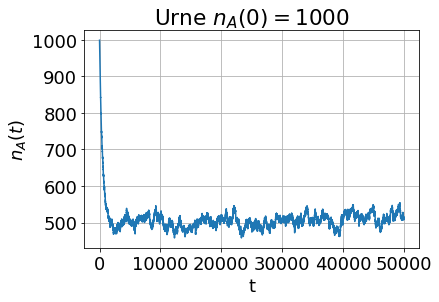

In [90]:
plt.plot(na_t);
#plt.xscale("log")
plt.xlabel("t")
plt.grid()
plt.ylabel("$n_A(t)$");
plt.title(fr"Urne $n_A(0)={n_boules}$");